# Face Alignment

In [1]:
import math
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt
from retinaface import RetinaFace as rf

img_1 = './img_1.png'
img_2 = './img_2.png'
def pp_images(imgs : list):
    _, axs = plt.subplots(1, len(imgs), figsize=(12, 12))
    for img, ax in zip(imgs, axs):
        ax.imshow(img)
    plt.show()

### retinaface

Metal device set to: Apple M1


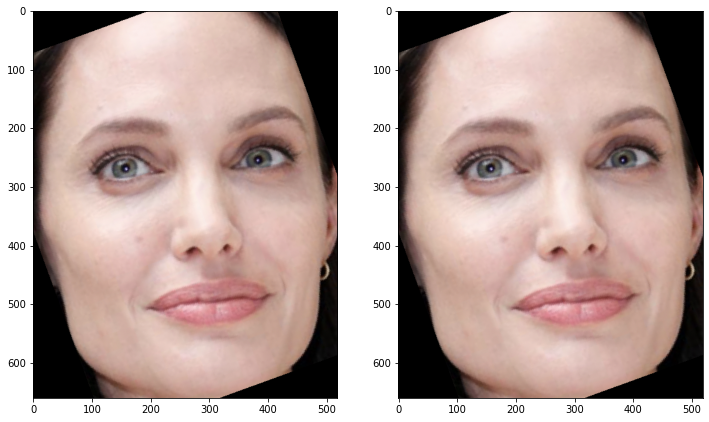

In [2]:
img_tensor_1 = cv2.imread(img_1)[...,::-1]
img_tensor_aligned_1 = rf.extract_faces(img_path = img_1, align = True)
faces = [img_tensor_aligned_1]
faces.extend(img_tensor_aligned_1)
pp_images([img_tensor_aligned_1[0],img_tensor_aligned_1[0]])

## alignment 2 faces

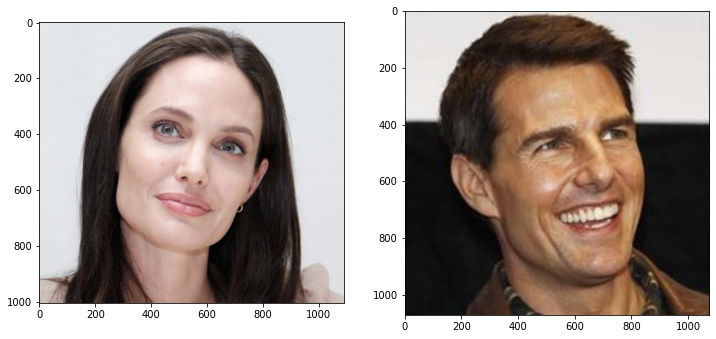

In [3]:
img_1 = cv2.imread(img_1)[...,::-1]
img_2 = cv2.imread(img_2)[...,::-1]
pp_images([img_1, img_2])

### extract landmarks

In [4]:
from pprint import pprint

resp_1 = rf.detect_faces(img_path = img_1)
resp_2 = rf.detect_faces(img_path = img_2)

pprint(resp_1)
pprint(resp_2)

eyes_1 = { 'eye_l' : resp_1['face_1']['landmarks']['left_eye'],
           'eye_r' : resp_1['face_1']['landmarks']['right_eye']}

eyes_2 = { 'eye_l' : resp_2['face_1']['landmarks']['left_eye'],
           'eye_r' : resp_2['face_1']['landmarks']['right_eye']}

{'face_1': {'facial_area': [282, 164, 785, 804],
            'landmarks': {'left_eye': [683.12494, 461.05853],
                          'mouth_left': [585.83673, 681.3445],
                          'mouth_right': [412.001, 616.3119],
                          'nose': [553.98346, 542.1002],
                          'right_eye': [467.06177, 384.8703]},
            'score': 0.9995286464691162}}
{'face_1': {'facial_area': [321, 173, 823, 866],
            'landmarks': {'left_eye': [744.6479, 446.83276],
                          'mouth_left': [768.0764, 675.54034],
                          'mouth_right': [585.4478, 709.2771],
                          'nose': [724.7684, 596.9448],
                          'right_eye': [538.0103, 484.94223]},
            'score': 0.9994344711303711}}


### calaulate angle

In [5]:
def cal_algle(eyedict : dict) :
    x1,y1 = eyedict['eye_l']
    x2,y2 = eyedict['eye_r']
    a = abs(y1-y2)
    b = abs(x2-x1)
    c = math.sqrt(a*a+b*b)
    cos_alpha = (b*b + c*c - a*a) / (2 * b*c)

    alpha = np.arccos(cos_alpha) #radius
    alpha = (alpha * 180)/ math.pi
    direction = -1 if y1-y2 < 0 else 1

    return alpha, direction

### rotating

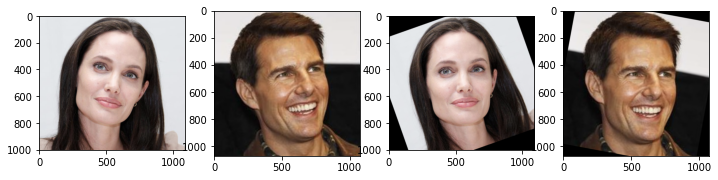

In [6]:
alpha, direction = cal_algle(eyes_1)
img_1_aligned = Image.fromarray(img_1)
img_1_aligned = np.array(img_1_aligned.rotate(alpha*direction))

alpha1, direction1 = cal_algle(eyes_2)
img_2_aligned = Image.fromarray(img_2)
img_2_aligned = np.array(img_2_aligned.rotate(alpha1*direction1))

pp_images([img_1, img_2, img_1_aligned, img_2_aligned])